In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('imdb_cleaned_v2.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      4979 non-null   object 
 1   director_name              4895 non-null   object 
 2   num_critic_for_reviews     4949 non-null   float64
 3   duration                   4983 non-null   float64
 4   director_facebook_likes    4895 non-null   float64
 5   actor_3_facebook_likes     4975 non-null   float64
 6   actor_2_name               4985 non-null   object 
 7   actor_1_facebook_likes     4991 non-null   float64
 8   gross                      4124 non-null   float64
 9   genres                     4998 non-null   object 
 10  actor_1_name               4991 non-null   object 
 11  movie_title                4998 non-null   object 
 12  num_voted_users            4998 non-null   int64  
 13  cast_total_facebook_likes  4998 non-null   int64

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,primary_genre,sub_genre
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,Action,Adventure
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,Action,Adventure
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,Action,Adventure
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,Action,Thriller
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,Documentary,NaN


c:\Users\rynoc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


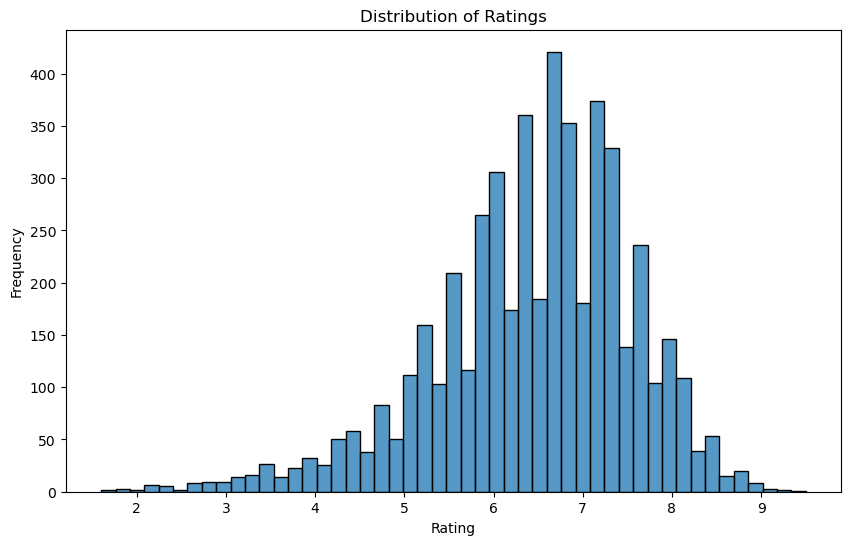

In [9]:
# Plotting the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['imdb_score'])
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [15]:
#converting genre and subgenre to numerical values
df['primary_genre'] = pd.factorize(df['primary_genre'])[0]
df['sub_genre'] = pd.factorize(df['sub_genre'])[0]

# creating dataframe with only numerical columns
df_num = df.select_dtypes(include=[np.number])

df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   num_critic_for_reviews     4949 non-null   float64
 1   duration                   4983 non-null   float64
 2   director_facebook_likes    4895 non-null   float64
 3   actor_3_facebook_likes     4975 non-null   float64
 4   actor_1_facebook_likes     4991 non-null   float64
 5   gross                      4124 non-null   float64
 6   num_voted_users            4998 non-null   int64  
 7   cast_total_facebook_likes  4998 non-null   int64  
 8   facenumber_in_poster       4985 non-null   float64
 9   num_user_for_reviews       4977 non-null   float64
 10  budget                     4511 non-null   float64
 11  title_year                 4891 non-null   float64
 12  actor_2_facebook_likes     4985 non-null   float64
 13  imdb_score                 4998 non-null   float

In [18]:
# removing rows with Nan values
df_num = df_num.dropna()


In [19]:
# Building random forest model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = df_num.drop(['imdb_score'], axis=1)
y = df_num['imdb_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Training the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [21]:
# Predicting the test set
y_pred = rf.predict(X_test)

In [22]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')


Mean Squared Error: 0.47757402917771863
R2 Score: 0.538954219885651


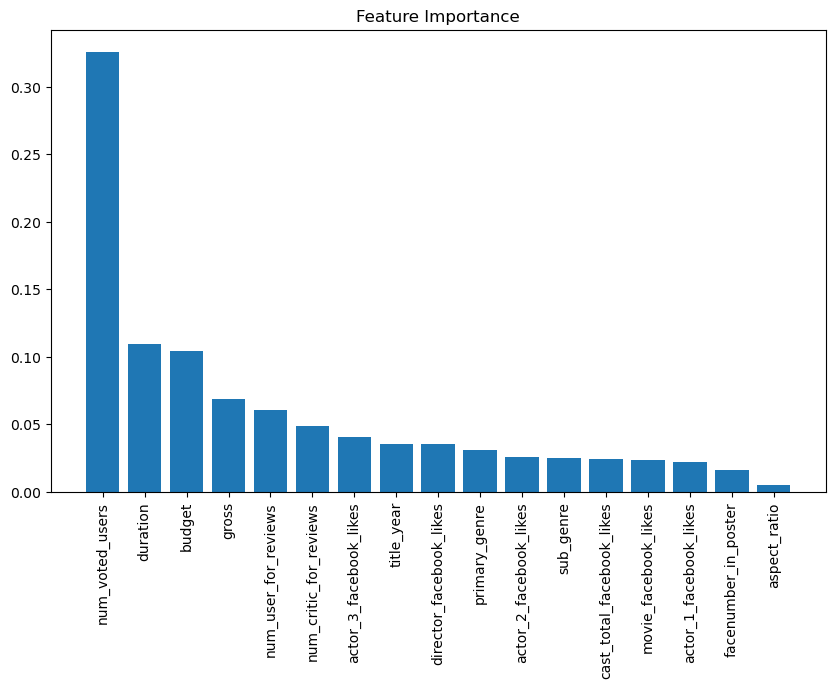

In [23]:
#plotting the feature importance
plt.figure(figsize=(10, 6))
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title('Feature Importance')
plt.show()


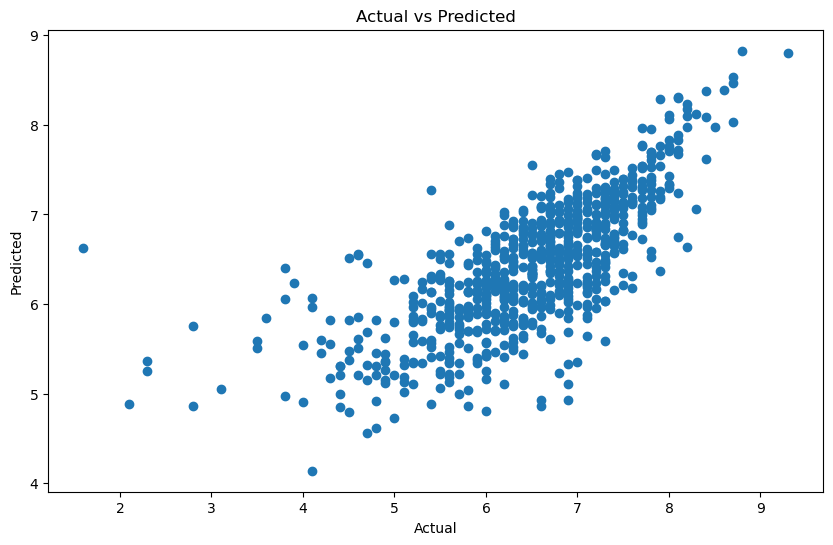

In [24]:
#plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()